In [26]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Get the overall info from the dataset


In [2]:
## Read the dataset from CSV file
toronto_df = pd.read_csv("textdata/Toronto-dataset.csv")

In [3]:
toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5418 entries, 0 to 5417
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 5417 non-null   object 
 1   created_at                  5418 non-null   object 
 2   hashtags                    3981 non-null   object 
 3   media                       76 non-null     object 
 4   urls                        5334 non-null   object 
 5   favorite_count              5418 non-null   int64  
 6   id                          5418 non-null   int64  
 7   in_reply_to_screen_name     64 non-null     object 
 8   in_reply_to_status_id       7 non-null      float64
 9   in_reply_to_user_id         64 non-null     float64
 10  lang                        5418 non-null   object 
 11  place                       5417 non-null   object 
 12  possibly_sensitive          5357 non-null   object 
 13  retweet_count               5418 

In [4]:
toronto_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-79.3872,43.648",Thu Mar 26 22:45:10 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-Ns5S9hrgl/?igshi...,1,1243308037366046721,NaN,NaN,NaN,...,330,168,21,Canada,Simply Eseeri,SimplyEseeri,9533,NaN,http://simplyeseeri.com,False
1,"-79.4523813,43.7143142",Fri Mar 20 13:22:05 +0000 2020,NaN,NaN,NaN,0,1240992007184691200,NaN,NaN,NaN,...,11322,9,319,NaN,Toronto Fire,tofire,1572636,NaN,https://iaingrant.com,False
2,"-79.38512824,43.6408863",Thu Mar 26 02:04:15 +0000 2020,BTPENT dttheartist Toronto artistlife isignmys...,NaN,https://www.instagram.com/p/B-Le4FXFBPS/?igshi...,0,1242995752416079872,NaN,NaN,NaN,...,1060,1054,23,Toronto,DT The Artist,dttheartist,11574,NaN,http://www.dttheartist.com,False
3,"-79.38512824,43.6408863",Wed Mar 25 20:11:32 +0000 2020,corona,NaN,https://www.instagram.com/p/B-K2VgrlEVy/?igshi...,0,1242906988675321861,NaN,NaN,NaN,...,2691,5217,5,"Toronto, Ontario",muzic souljah 1,muzicsouljah1,1532,NaN,http://paradigmgroupentertainment.ca,False
4,"-79.3872,43.648",Wed Mar 25 03:29:35 +0000 2020,stayhome covid_19 corona coronamemes quotes se...,NaN,https://www.instagram.com/p/B-JD2mGAth0/?igshi...,0,1242654837713625089,NaN,NaN,NaN,...,266,382,8,"Toronto, Ontario",Argentina Beltran gabe+angel,gabeandangel,1032,NaN,https://linktr.ee/gabeandangel,False


In [5]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = toronto_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = toronto_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = toronto_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = toronto_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [6]:
df_text.head(10)    

,text,created_at,place,hashtags
0,What have I’ve been up to? ⁣⁣ ⁣Washing my hand...,Thu Mar 26 22:45:10 +0000 2020,"Toronto, Ontario",<NA>
1,Alarm (highrise Residential) [North York] Lawr...,Fri Mar 20 13:22:05 +0000 2020,"Toronto, Ontario",<NA>
2,How @mr4_dh and myself pass people when we see...,Thu Mar 26 02:04:15 +0000 2020,"Toronto, Ontario",BTPENT dttheartist Toronto artistlife isignmys...
3,Life b4 #corona🍺 @ Toronto C•A•N•A•D•A https:/...,Wed Mar 25 20:11:32 +0000 2020,"Toronto, Ontario",corona
4,Let’s all be brave and stay at home yeah? #sta...,Wed Mar 25 03:29:35 +0000 2020,"Toronto, Ontario",stayhome covid_19 corona coronamemes quotes se...
5,Sending love wherever it’s needed 💕☮️#uponocca...,Mon Mar 23 13:22:42 +0000 2020,"Toronto, Ontario",uponoccasion uponoccasionevents sendinglove lo...
6,"Thursday night, corona time, isolated 18 floor...",Fri Mar 20 01:00:28 +0000 2020,"Toronto, Ontario",netflix amazonprime tequila donjulio70 hope li...
7,Shibani Kashyap’s new tune: ‘Corona ko hai har...,Sat Mar 28 16:27:32 +0000 2020,"Brampton, Ontario",Entertainment EntertainmentMusic
8,People in Toronto are “Annoyed” by this opera ...,Tue Mar 24 18:22:20 +0000 2020,"Toronto, Ontario",covid_19 socialdistancing coronavirus corona f...
9,Hey hey hey m'fitties! B.C. = BEFORE CORONA. ...,Mon Mar 30 16:22:29 +0000 2020,"Toronto, Ontario",<NA>


## Cleaning the text Data

In [7]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [8]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [9]:
df_text.head(2)

,text,created_at,place,hashtags
0,What have Ive been up to Washing my hands soci...,Thu Mar 26 22:45:10 +0000 2020,"Toronto, Ontario",<NA>
1,Alarm highrise Residential North YorkLawrence ...,Fri Mar 20 13:22:05 +0000 2020,"Toronto, Ontario",<NA>


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [10]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
df_text.head(10)


,text,created_at,place,hashtags,subjectivity,polarity
0,What have Ive been up to Washing my hands soci...,Thu Mar 26 22:45:10 +0000 2020,"Toronto, Ontario",<NA>,0.533333,0.016667
1,Alarm highrise Residential North YorkLawrence ...,Fri Mar 20 13:22:05 +0000 2020,"Toronto, Ontario",<NA>,0.000000,0.000000
2,How rdh and myself pass people when we see the...,Thu Mar 26 02:04:15 +0000 2020,"Toronto, Ontario",BTPENT dttheartist Toronto artistlife isignmys...,0.000000,0.000000
3,Life b corona CANADA,Wed Mar 25 20:11:32 +0000 2020,"Toronto, Ontario",corona,0.000000,0.000000
4,Lets all be brave and stay at home yeah stayho...,Wed Mar 25 03:29:35 +0000 2020,"Toronto, Ontario",stayhome covid_19 corona coronamemes quotes se...,1.000000,0.800000
5,Sending love wherever its needed uponoccasion ...,Mon Mar 23 13:22:42 +0000 2020,"Toronto, Ontario",uponoccasion uponoccasionevents sendinglove lo...,0.600000,0.500000
6,Thursday night corona time isolated floors up...,Fri Mar 20 01:00:28 +0000 2020,"Toronto, Ontario",netflix amazonprime tequila donjulio70 hope li...,1.000000,-0.500000
7,Shibani Kashyaps new tune Corona ko hai harana...,Sat Mar 28 16:27:32 +0000 2020,"Brampton, Ontario",Entertainment EntertainmentMusic,0.677273,0.368182
8,People in are Annoyed by this opera singer gi...,Tue Mar 24 18:22:20 +0000 2020,"Toronto, Ontario",covid_19 socialdistancing coronavirus corona f...,0.800000,-0.400000
9,Hey hey hey mfittiesBC BEFORE CORONA D So wan...,Mon Mar 30 16:22:29 +0000 2020,"Toronto, Ontario",<NA>,0.700000,-0.400000


In [25]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_toronto.csv")

## Make a WordCloud chart -word frequency map

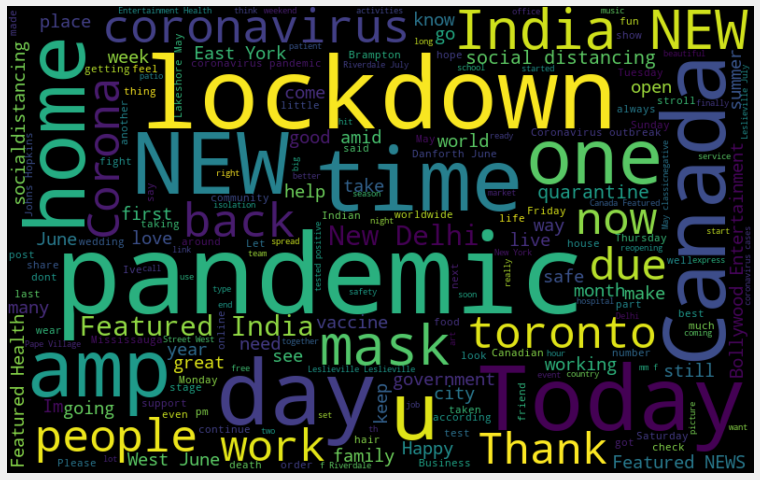

In [13]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [14]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [15]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
for i in range(0, sortedDF_text.shape[0]):
    if (sortedDF_text['analysis'][i] == 'Negative'):
        print(str(j)+ ')' + sortedDF_text['text'][i])
        # print()  #to print uncomment
        j = j+1

1)Thursday night corona time isolated  floors up and bored AF so netflix  amazonprime and tequila donjulio hope life strenght resilience wecandoittogether toronto canada    
2)People in  are Annoyed by this opera singer giving performances from her balcony every night during quarantine  socialdistancing coronavirus corona followforfollowback  Etobicoke 
3)Hey hey hey mfittiesBC  BEFORE CORONA D So wanna see what I was doing BC isolationHeres a behind the scenes tour of the health food store  supplements store I manage Check out the fat burners 
4)Day  of Quarantine Slightly turning into a dog  quarantine stayhome yomequedoencasa cuarentena  corona virus coronavirus dog dogsofinstagram doglife doglover dogoftheday snapchat 
5)Reposted from  This is serious and personal nowcorona  virus personalhygiene   regrann    
6)Hows your morning beenI had a breakfast n also drink coffee every morning Anywaythis month n also next month plans are all cancelled cos shocking corona virusI wanna go to 

## All Positive Tweets

In [16]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
for i in range(0, sortedDF_text.shape[0]):
    if (sortedDF_text['analysis'][i] == 'Positive'):
        print(str(j)+ ')' + sortedDF_text['text'][i])
        print()
        j = j+1

1)What have Ive been up to Washing my hands social distancing and self isolation Im doing my part to reduce the spread and potential risk of contracting the corona virus and I hope you are too Aside 

2)Lets all be brave and stay at home yeah stayhome  corona coronamemes quotes selfisolation quarantine quarantineandchill    

3)Sending love wherever its needed uponoccasion uponoccasionevents sendinglove lovewherever whereveritsneeded lovewhereverhugo love peace  corona sendinglove peace 

4)Shibani Kashyaps new tune Corona ko hai harana At a time when people across the globe are finding ways to bust  anxiety singer Shibani Kashyap popular for songs like Sajnaa aa bhi jaa and Zinda hoon  Entertainment EntertainmentMusic

5)Part  Cause Im tired of hearing about Corona virus I decided to post my tats and tell ya the meaning Feel free to share ur tats and there meaning too Id love to know I was actually on tv for this tat at 

6)Im done positing about Corona War n conspiracy shot b they de

## Scatter pLot - map the postitive-negative distribution

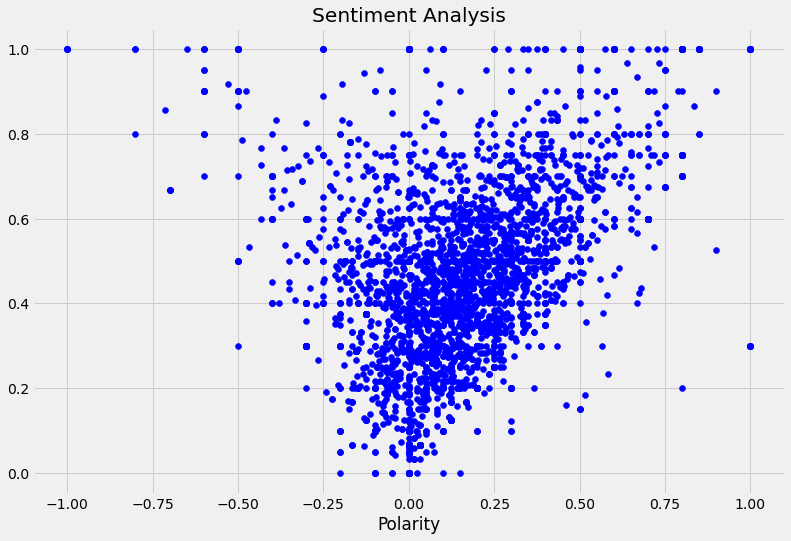

In [17]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [18]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 50.3 %


In [19]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 14.4 %


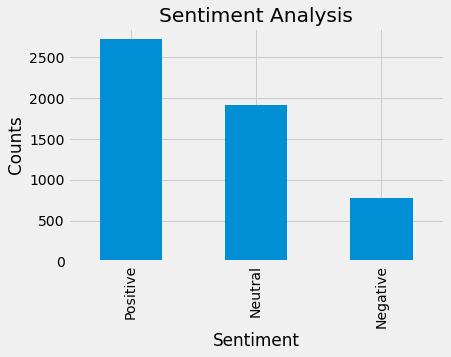

In [20]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [27]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [32]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [33]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,What have Ive been up to Washing my hands soci...,Thu Mar 26 22:45:10 +0000 2020,"Toronto, Ontario",<NA>,0.533333,0.016667,Positive,"[What, have, Ive, been, up, to, Washing, my, h..."


In [34]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,what have ive been up to washing my hands soci...,thu mar 26 22:45:10 +0000 2020,"toronto, ontario",<na>,0.5333333333333333,0.016666666666666666,positive,"['what', 'have', 'ive', 'been', 'up', 'to', 'w..."


## B.2 Apply Filters - Find/Remove Stopwords

In [35]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [36]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [38]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [39]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,what have ive been up to washing my hands soci...,thu mar 26 22:45:10 +0000 2020,"toronto, ontario",<na>,0.5333333333333333,0.016666666666666666,positive,"[, , ive, , , , washing, , hands, social, dist..."
1,alarm highrise residential north yorklawrence ...,fri mar 20 13:22:05 +0000 2020,"toronto, ontario",<na>,0.0,0.0,neutral,"[alarm, highrise, residential, north, yorklawr..."


## B.2 Apply Filters - stemming words

In [40]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [41]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [42]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,what have ive been up to washing my hands soci...,thu mar 26 22:45:10 +0000 2020,"toronto, ontario",<na>,0.5333333333333333,0.016666666666666666,positive,"[, , ive, , , , wash, , hand, social, distanc,..."
1,alarm highrise residential north yorklawrence ...,fri mar 20 13:22:05 +0000 2020,"toronto, ontario",<na>,0.0,0.0,neutral,"[alarm, highris, residenti, north, yorklawr, a..."


## Return the cleaned data into a sentence format

In [43]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,what have ive been up to washing my hands soci...,thu mar 26 22:45:10 +0000 2020,"toronto, ontario",<na>,0.5333333333333333,0.016666666666666666,positive,ive wash hand social distanc self isol ...
1,alarm highrise residential north yorklawrence ...,fri mar 20 13:22:05 +0000 2020,"toronto, ontario",<na>,0.0,0.0,neutral,alarm highris residenti north yorklawr avenu c...
2,how rdh and myself pass people when we see the...,thu mar 26 02:04:15 +0000 2020,"toronto, ontario",btpent dttheartist toronto artistlife isignmys...,0.0,0.0,neutral,rdh pass peopl see corona viru quarant...
3,life b corona canada,wed mar 25 20:11:32 +0000 2020,"toronto, ontario",corona,0.0,0.0,neutral,life b corona canada
4,lets all be brave and stay at home yeah stayho...,wed mar 25 03:29:35 +0000 2020,"toronto, ontario",stayhome covid_19 corona coronamemes quotes se...,1.0,0.8,positive,let brave stay home yeah stayhom corona co...
5,sending love wherever its needed uponoccasion ...,mon mar 23 13:22:42 +0000 2020,"toronto, ontario",uponoccasion uponoccasionevents sendinglove lo...,0.6,0.5,positive,send love wherev need uponoccas uponoccasione...
6,thursday night corona time isolated floors up...,fri mar 20 01:00:28 +0000 2020,"toronto, ontario",netflix amazonprime tequila donjulio70 hope li...,1.0,-0.5,negative,thursday night corona time isol floor bore a...
7,shibani kashyaps new tune corona ko hai harana...,sat mar 28 16:27:32 +0000 2020,"brampton, ontario",entertainment entertainmentmusic,0.6772727272727272,0.36818181818181817,positive,shibani kashyap new tune corona ko hai harana ...
8,people in are annoyed by this opera singer gi...,tue mar 24 18:22:20 +0000 2020,"toronto, ontario",covid_19 socialdistancing coronavirus corona f...,0.8,-0.4,negative,peopl annoy opera singer give perform ba...
9,hey hey hey mfittiesbc before corona d so wan...,mon mar 30 16:22:29 +0000 2020,"toronto, ontario",<na>,0.7,-0.4,negative,hey hey hey mfittiesbc corona wan na see ...


## Create a WordCloud from cleaned tweets


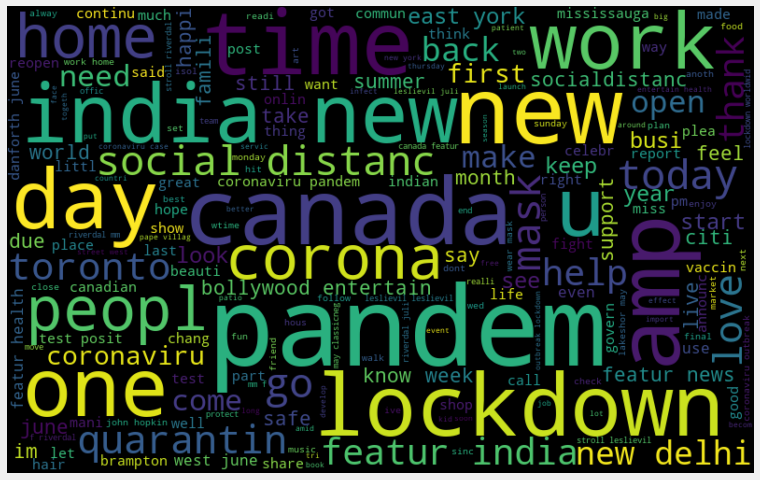

In [44]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

# size the plt object
plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [45]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x2adc75758520>>

In [46]:
from datetime import datetime
from dateutil.parser import parse


In [47]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
# Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [48]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,what have ive been up to washing my hands soci...,thu mar 26 22:45:10 +0000 2020,"toronto, ontario",<na>,0.5333333333333333,0.016666666666666666,positive,ive wash hand social distanc self isol ...,2020-03-26 22:45:10,3
1,alarm highrise residential north yorklawrence ...,fri mar 20 13:22:05 +0000 2020,"toronto, ontario",<na>,0.0,0.0,neutral,alarm highris residenti north yorklawr avenu c...,2020-03-20 13:22:05,3
2,how rdh and myself pass people when we see the...,thu mar 26 02:04:15 +0000 2020,"toronto, ontario",btpent dttheartist toronto artistlife isignmys...,0.0,0.0,neutral,rdh pass peopl see corona viru quarant...,2020-03-26 02:04:15,3


## Data preparation for further visualizations

In [49]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [50]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,<na>,0.146667
1,ajax,0.198292
2,aurora,0.225217
3,barrie,0.258013
4,bradford west gwillimbury,0.004408


<AxesSubplot:ylabel='place'>

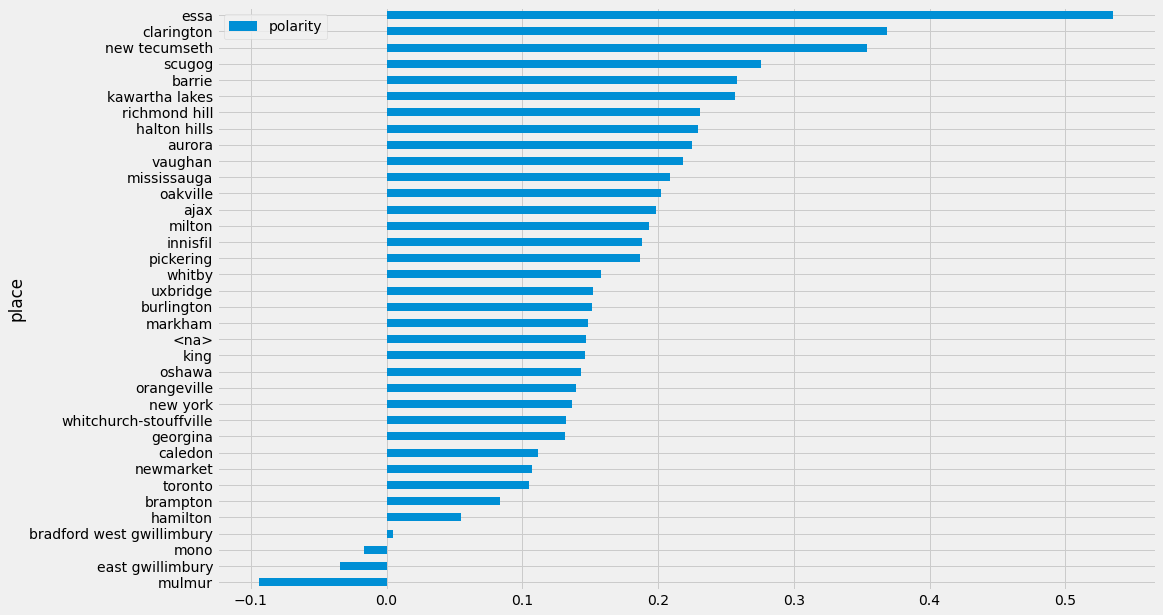

In [51]:
# Chart sentiments based on regions

#df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 10))





In [52]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.121948
1,4,0.117046
2,5,0.137847
3,6,0.120448
4,7,0.105503


<AxesSubplot:xlabel='month'>

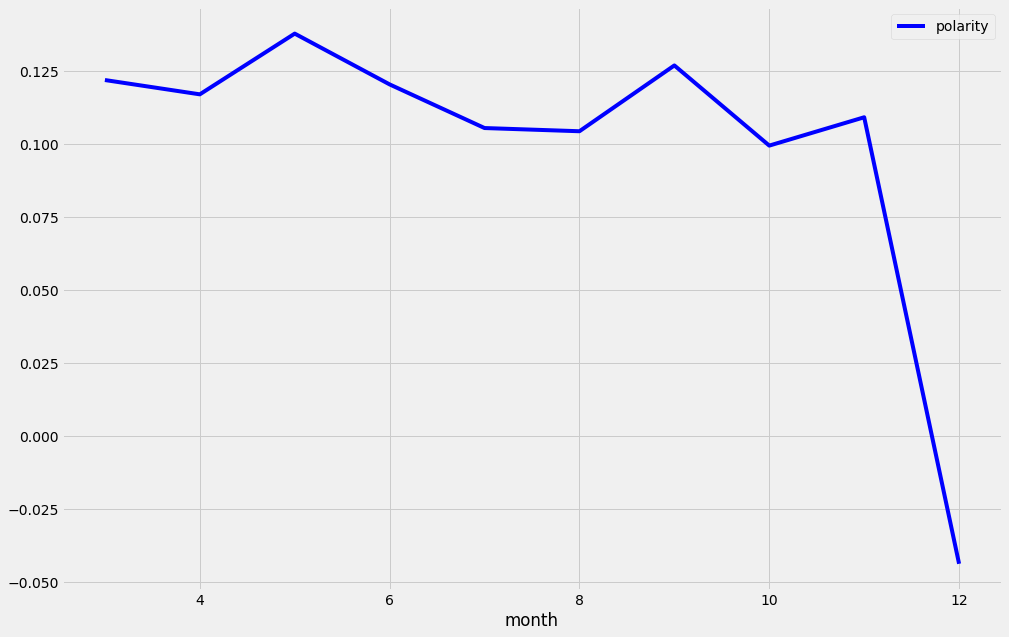

In [53]:
# Chart sentiments based on regions

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue")


## Extract Hashtags

In [54]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,what have ive been up to washing my hands soci...,thu mar 26 22:45:10 +0000 2020,toronto,<na>,0.533333,0.016667,positive,ive wash hand social distanc self isol ...,2020-03-26 22:45:10,3
1,alarm highrise residential north yorklawrence ...,fri mar 20 13:22:05 +0000 2020,toronto,<na>,0.000000,0.000000,neutral,alarm highris residenti north yorklawr avenu c...,2020-03-20 13:22:05,3
2,how rdh and myself pass people when we see the...,thu mar 26 02:04:15 +0000 2020,toronto,btpent dttheartist toronto artistlife isignmys...,0.000000,0.000000,neutral,rdh pass peopl see corona viru quarant...,2020-03-26 02:04:15,3
3,life b corona canada,wed mar 25 20:11:32 +0000 2020,toronto,corona,0.000000,0.000000,neutral,life b corona canada,2020-03-25 20:11:32,3
4,lets all be brave and stay at home yeah stayho...,wed mar 25 03:29:35 +0000 2020,toronto,stayhome covid_19 corona coronamemes quotes se...,1.000000,0.800000,positive,let brave stay home yeah stayhom corona co...,2020-03-25 03:29:35,3
5,sending love wherever its needed uponoccasion ...,mon mar 23 13:22:42 +0000 2020,toronto,uponoccasion uponoccasionevents sendinglove lo...,0.600000,0.500000,positive,send love wherev need uponoccas uponoccasione...,2020-03-23 13:22:42,3
6,thursday night corona time isolated floors up...,fri mar 20 01:00:28 +0000 2020,toronto,netflix amazonprime tequila donjulio70 hope li...,1.000000,-0.500000,negative,thursday night corona time isol floor bore a...,2020-03-20 01:00:28,3
7,shibani kashyaps new tune corona ko hai harana...,sat mar 28 16:27:32 +0000 2020,brampton,entertainment entertainmentmusic,0.677273,0.368182,positive,shibani kashyap new tune corona ko hai harana ...,2020-03-28 16:27:32,3
8,people in are annoyed by this opera singer gi...,tue mar 24 18:22:20 +0000 2020,toronto,covid_19 socialdistancing coronavirus corona f...,0.800000,-0.400000,negative,peopl annoy opera singer give perform ba...,2020-03-24 18:22:20,3
9,hey hey hey mfittiesbc before corona d so wan...,mon mar 30 16:22:29 +0000 2020,toronto,<na>,0.700000,-0.400000,negative,hey hey hey mfittiesbc corona wan na see ...,2020-03-30 16:22:29,3


In [55]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [56]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [57]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
69,covid19,219
11,covid_19,106
87,bnw,78
70,featured,77
72,news,63
516,ig_street,59
517,urbanstreetphotogallery,56
522,urbanstreetphotography,50
525,photodocumentary,45
521,streetphotographer,40


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

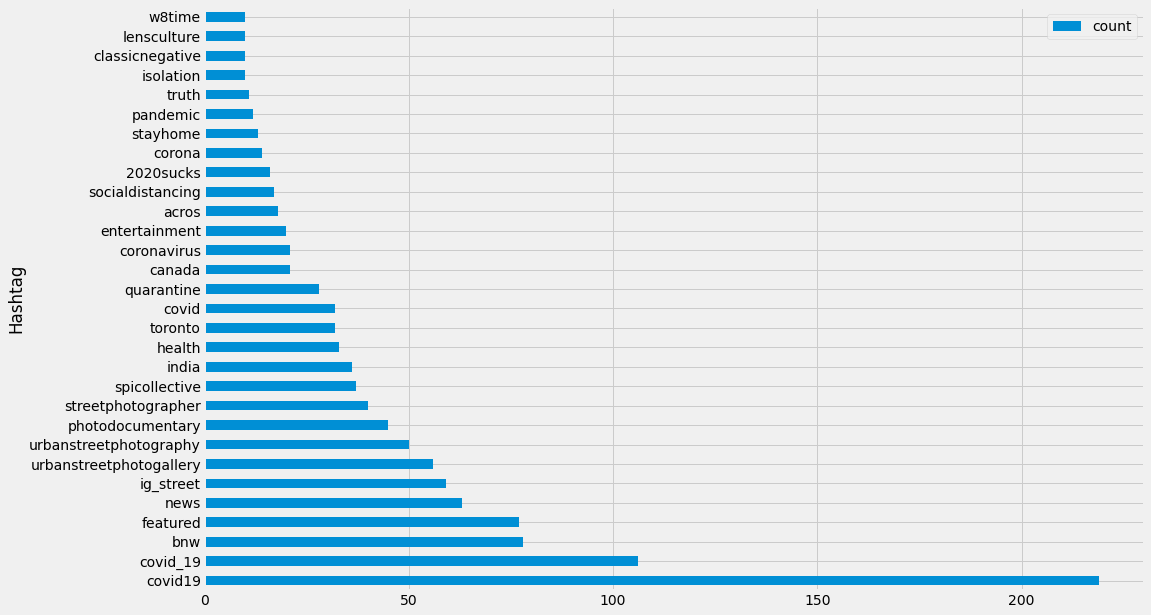

In [58]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))


In [59]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
35,covid19,802
21,featured,314
23,news,272
1,covid_19,222
70,toronto,157
79,india,157
22,health,135
43,canada,102
20,coronavirus,99
126,covid,93


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

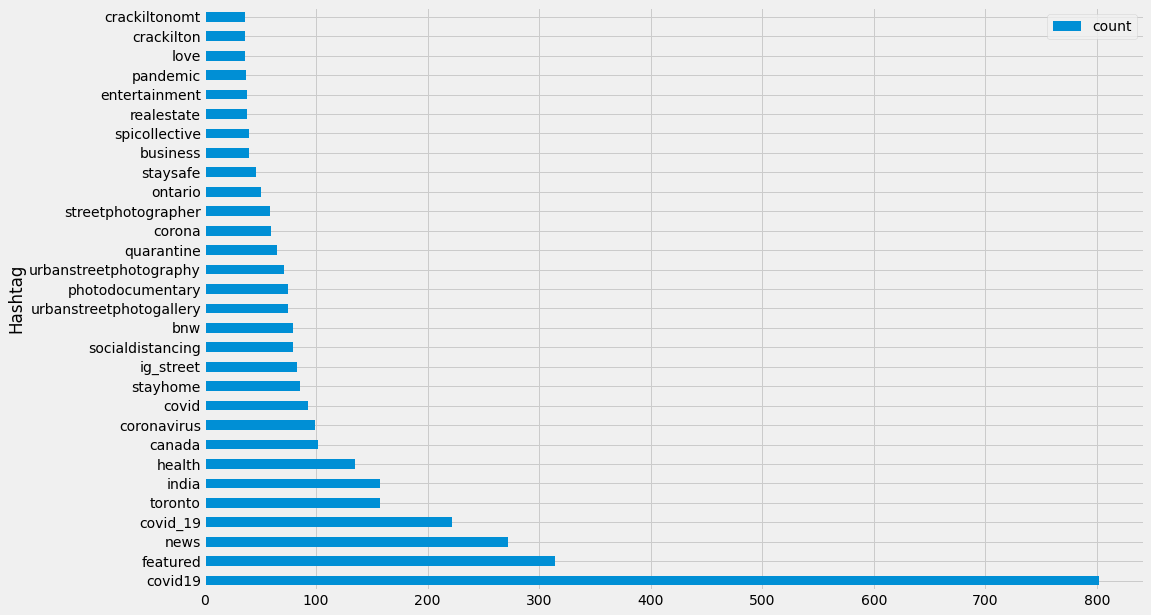

In [60]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))

In [61]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [62]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [63]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,what have ive been up to washing my hands soci...,thu mar 26 22:45:10 +0000 2020,toronto,<na>,0.533333,0.016667,positive,ive wash hand social distanc self isol ...,2020-03-26 22:45:10,3,0
1,alarm highrise residential north yorklawrence ...,fri mar 20 13:22:05 +0000 2020,toronto,<na>,0.000000,0.000000,neutral,alarm highris residenti north yorklawr avenu c...,2020-03-20 13:22:05,3,0
2,how rdh and myself pass people when we see the...,thu mar 26 02:04:15 +0000 2020,toronto,btpent dttheartist toronto artistlife isignmys...,0.000000,0.000000,neutral,rdh pass peopl see corona viru quarant...,2020-03-26 02:04:15,3,0
3,life b corona canada,wed mar 25 20:11:32 +0000 2020,toronto,corona,0.000000,0.000000,neutral,life b corona canada,2020-03-25 20:11:32,3,0
4,lets all be brave and stay at home yeah stayho...,wed mar 25 03:29:35 +0000 2020,toronto,stayhome covid_19 corona coronamemes quotes se...,1.000000,0.800000,positive,let brave stay home yeah stayhom corona co...,2020-03-25 03:29:35,3,0
